# **Exercise 03: *overfitting***

Import necessary *Python* packages:

In [1]:
import sys

Add path to own modules:

In [2]:
sys.path.append("../../src", )

Import necessary entities:

In [3]:
from numpy import ndarray
from sklearn.svm import SVC
from joblib import dump, load
from warnings import filterwarnings
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas import (
    Series,
    DataFrame,
    read_csv,
)

Import own necessary entities:

In [4]:
from plot_utils import draw_top_important_features

Ignore all warnings:

In [5]:
filterwarnings("ignore", )

Create a dictionary for `read_csv()` method calling:

In [6]:
read_csv_params: dict[str, str] = {
    "file": "dayofweek.csv",
    "file_path": "../../data/datasets/",
}

Read the file `dayofweek.csv` to a *Pandas* dataframe:

In [7]:
df: DataFrame = read_csv(
    read_csv_params["file_path"] + read_csv_params["file"],
    index_col=0,
)

Check `df` *Pandas* dataframe:

In [8]:
df.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek,naive_prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4,3


Prepare features and target variables:

In [9]:
X: DataFrame = df.drop(
    columns=["dayofweek", "naive_prediction", ],
)
y: Series = df["dayofweek"]

Check `X` and `y` variables:

In [10]:
X.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352


In [11]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: dayofweek, dtype: int64

## Using `train_test_split()` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=21,
)

Check `X_train`, `X_test`, `y_train`, `y_test` variables:

In [13]:
X_train.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
1236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008912,0.711533
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.310119,-0.223863
1067,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.806492,0.009986
1584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.104622,-1.393108
45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.246313,0.945382


In [14]:
X_test.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.724861,-0.925410
1520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,0.945382
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.756764,-0.457712
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.629151,0.945382
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.086797,0.243835


In [15]:
y_train.head()

1236    2
173     5
1067    1
1584    4
45      5
Name: dayofweek, dtype: int64

In [16]:
y_test.head()

12      4
1520    3
500     5
323     6
142     4
Name: dayofweek, dtype: int64

## Check the distribution of classes is similar in train and test:

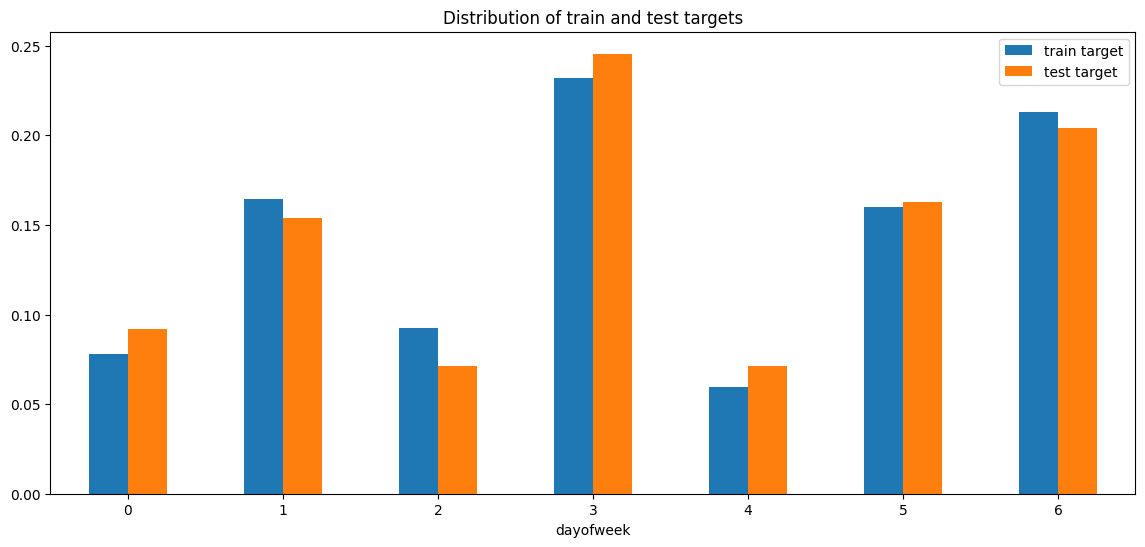

In [17]:
DataFrame({
    "train target": y_train.value_counts(normalize=True, ),
    "test target": y_test.value_counts(normalize=True, ),
}, ).plot(
    kind="bar",
    title="Distribution of train and test targets",
    figsize=(14, 6, ),
    rot=0,
);

## Add the parameter `stratify=` and check the distribution again:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=21,
)

Check `X_train`, `X_test`, `y_train`, `y_test` variables:

In [19]:
X_train.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-0.691561
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.629151,-1.159259
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.788667,-1.393108
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.533442,0.945382
714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.678880,-0.925410


In [20]:
X_test.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour
1087,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.316943,0.243835
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.788667,-0.691561
563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.373926,-1.393108
1381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.182507,-0.223863
1199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.533442,-0.691561


In [21]:
y_train.head()

860    6
385    4
422    5
326    6
714    1
Name: dayofweek, dtype: int64

In [22]:
y_test.head()

1087    1
16      5
563     6
1381    3
1199    2
Name: dayofweek, dtype: int64

Check `target` distribution again:

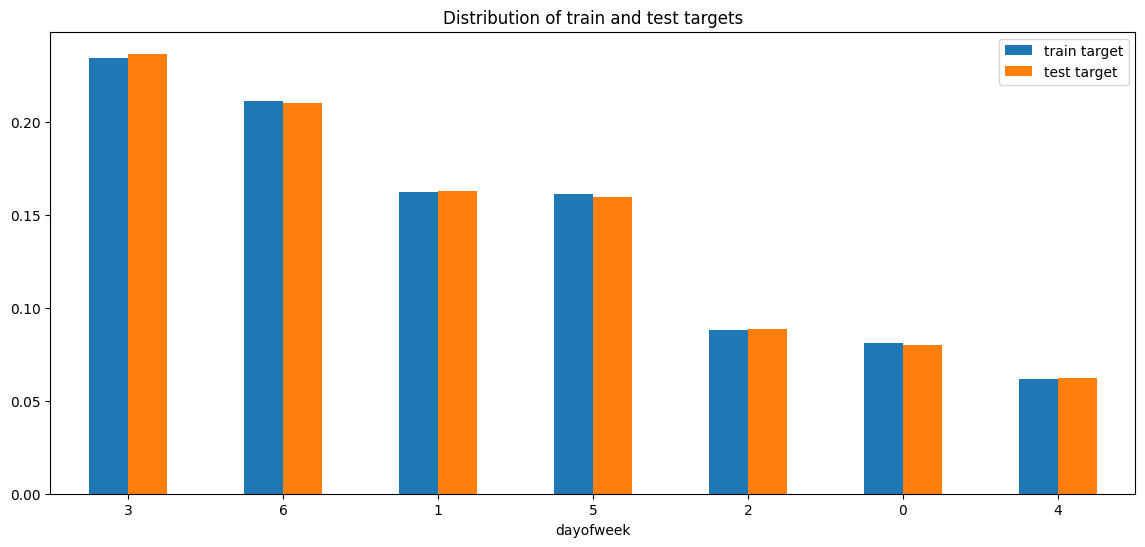

In [23]:
DataFrame({
    "train target": y_train.value_counts(normalize=True, ),
    "test target": y_test.value_counts(normalize=True, ),
}, ).plot(
    kind="bar",
    title="Distribution of train and test targets",
    figsize=(14, 6, ),
    rot=0,
);

Create a model of *logistic regression*:

In [24]:
log_reg_model: LogisticRegression = LogisticRegression(
    random_state=21,
    solver="liblinear",
    fit_intercept=False,
)

Train *logistic regression* model on the data:

In [25]:
log_reg_model.fit(X_train, y_train, );

Calculate *logistic regression* model accuracy for the data:

In [26]:
print(
    "The logistic regression model accuracy is:",
    round(
        accuracy_score(
            y_test,
            log_reg_model.predict(X_test, ),
        ),
        3,
    ),
)

The logistic regression model accuracy is: 0.615


Create a model of *SVC*:

In [27]:
svc_model: SVC = SVC(
    kernel="linear",
    random_state=21,
    probability=True,
)

Use `OneVsRestClassifier` over the *SVC* model:

In [28]:
svc_multi_model: OneVsRestClassifier = OneVsRestClassifier(svc_model, )

Train *SVC* model on the data:

In [29]:
svc_multi_model.fit(X_train, y_train, );

Calculate *SVC* model accuracy for the data:

In [30]:
print(
    "The SVC model accuracy is:",
    round(
        accuracy_score(
            y_test,
            svc_multi_model.predict(X_test, ),
        ),
        3,
    ),
)

The SVC model accuracy is: 0.618


Create a model of *decision tree*:

In [31]:
tree_model: DecisionTreeClassifier = DecisionTreeClassifier(
    max_depth=4,
    random_state=21,
)

Train *decision tree* model on the data:

In [32]:
tree_model.fit(X_train, y_train, );

Calculate *decision tree* model accuracy for the data:

In [33]:
print(
    "The decision tree model accuracy is:",
    round(
        accuracy_score(
            y_test,
            tree_model.predict(X_test, ),
        ),
        3,
    ),
)

The decision tree model accuracy is: 0.53


Create a model of *random forest*:

In [34]:
forest_tree_model: RandomForestClassifier = RandomForestClassifier(
    max_depth=25,
    random_state=21,
    n_estimators=100,
)

Train *random forest* model on the data:

In [35]:
forest_tree_model.fit(X_train, y_train, );

Calculate *random forest* model accuracy for the data:

In [36]:
print(
    "The random forest model accuracy is:",
    round(
        accuracy_score(
            y_test,
            forest_tree_model.predict(X_test, ),
        ),
        3,
    ),
)

The random forest model accuracy is: 0.932


## `Did all the models show the similar values of the metric?`

Answer: no, metrics values have dropped.

## `Which one has the largest difference comparing the current exercise and the previous?`

Answer: `RandomForestClassifier`.

## Test dataset is only for checking quality of a final model.
## There is another way of solving the problem – *crossvalidation*.
## It does not use test dataset, but creates one more split of train dataset.
## There is a validation dataset that is used for hyperparameters optimization.

## Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model:

In [37]:
log_reg_model_scores: ndarray = cross_val_score(
    log_reg_model,
    X,
    y,
    cv=10,
    scoring="accuracy",
)

Calculate *logistic regression* model mean accuracy for the data:

In [38]:
print(
    "The mean logistic regression model accuracy is:",
    round(
        log_reg_model_scores.mean(),
        3,
    ),
)

The mean logistic regression model accuracy is: 0.453


Calculate *logistic regression* model std accuracy for the data:

In [39]:
print(
    "The std logistic regression model accuracy is:",
    round(
        log_reg_model_scores.std(),
        3,
    ),
)

The std logistic regression model accuracy is: 0.17


Calculate *cross validation* scores for *SVC* model:

In [40]:
svc_multi_model_scores: ndarray = cross_val_score(
    svc_multi_model,
    X,
    y,
    cv=10,
    scoring="accuracy",
)

Calculate *SVC* model mean accuracy for the data:

In [41]:
print(
    "The mean SVC model accuracy is:",
    round(
        svc_multi_model_scores.mean(),
        3,
    ),
)

The mean SVC model accuracy is: 0.444


Calculate *SVC* model std accuracy for the data:

In [42]:
print(
    "The std SVC model accuracy is:",
    round(
        svc_multi_model_scores.std(),
        3,
    ),
)

The std SVC model accuracy is: 0.143


Calculate *cross validation* scores for *decision tree* model:

In [43]:
tree_model_scores: ndarray = cross_val_score(
    tree_model,
    X,
    y,
    cv=10,
    scoring="accuracy",
)

Calculate *decision tree* model mean accuracy for the data:

In [44]:
print(
    "The mean decision tree model accuracy is:",
    round(
        tree_model_scores.mean(),
        3,
    ),
)

The mean decision tree model accuracy is: 0.388


Calculate *decision tree* model std accuracy for the data:

In [45]:
print(
    "The std decision tree model accuracy is:",
    round(
        tree_model_scores.std(),
        3,
    ),
)

The std decision tree model accuracy is: 0.118


Calculate *cross validation* scores for *random forest* model:

In [46]:
forest_tree_model_scores: ndarray = cross_val_score(
    forest_tree_model,
    X,
    y,
    cv=10,
    scoring="accuracy",
)

Calculate *random forest* model mean accuracy for the data:

In [47]:
print(
    "The mean random forest model accuracy is:",
    round(
        forest_tree_model_scores.mean(),
        3,
    ),
)

The mean random forest model accuracy is: 0.656


Calculate *random forest* model std accuracy for the data:

In [48]:
print(
    "The std random forest model accuracy is:",
    round(
        forest_tree_model_scores.std(),
        3,
    ),
)

The std random forest model accuracy is: 0.183


## Choose the best model and play with the parameters on cross-validation:

Create a list with differents *random forest* model `max_depth` parameter values:

In [49]:
max_depths: list[int] = [max_depth for max_depth in range(5, 21, )]

Create a list with differents *random forest* model `n_estimators` parameter values:

In [50]:
n_estimators: list[int] = [
    curr_n_estimators
    for curr_n_estimators
    in range(50, 200, 10, )
]

Try differents *random forest* model values of parameters:

In [51]:
best_max_depth_val: int = 0
best_n_estimators_val: int = 0
best_accuracy_val: float = 0.0

for max_depth in max_depths:
    for curr_n_estimators in n_estimators:
        loc_forest_tree_model: RandomForestClassifier = RandomForestClassifier(
            n_estimators=curr_n_estimators,
            max_depth=max_depth,
            random_state=21,
        )
        loc_accuracy_val: float = round(
            cross_val_score(
                loc_forest_tree_model,
                X,
                y,
                cv=10,
                scoring="accuracy",
            ).mean(),
            3,
        )

        if loc_accuracy_val > best_accuracy_val:
            best_max_depth_val = max_depth
            best_accuracy_val = loc_accuracy_val
            best_n_estimators_val = curr_n_estimators

Find the best *random forest* model parameters values:

In [52]:
print(
    "The best random forest model parameters are:",
    "\nThe best `max_depth` is:",
    best_max_depth_val,
    "\nThe best `n_estimators` is:",
    best_n_estimators_val,
    "\nThe best accuracy value is:",
    best_accuracy_val,
)

The best random forest model parameters are: 
The best `max_depth` is: 15 
The best `n_estimators` is: 60 
The best accuracy value is: 0.672


Create a optimized model of *random forest*:

In [53]:
optimized_forest_tree_model: RandomForestClassifier = RandomForestClassifier(
    random_state=21,
    max_depth=best_max_depth_val,
    n_estimators=best_n_estimators_val,
)

Train optimized *random forest* model on the data:

In [54]:
optimized_forest_tree_model.fit(X_train, y_train, );

Calculate optimized *random forest* model accuracy for the data:

In [55]:
print(
    "The optimized random forest model accuracy is:",
    round(
        accuracy_score(
            y_test,
            optimized_forest_tree_model.predict(X_test, ),
        ),
        3,
    ),
)

The optimized random forest model accuracy is: 0.899


## Draw a plot for the optimized *random forest* model with top `10` most important features:

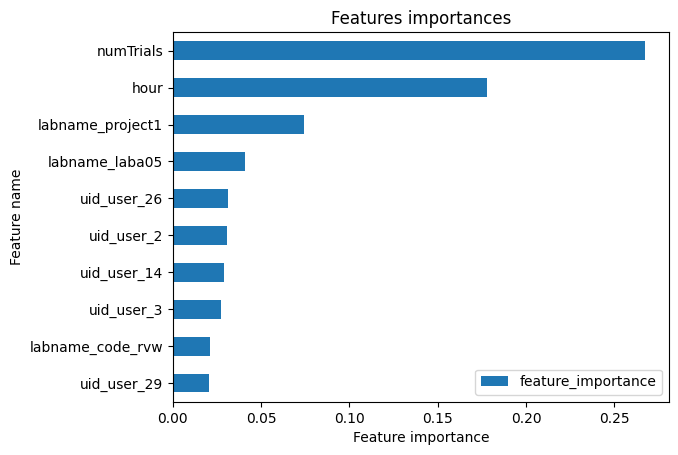

In [56]:
draw_top_important_features(
    optimized_forest_tree_model.feature_names_in_,
    optimized_forest_tree_model.feature_importances_,
)

## Save the optimized *random forest* model using `joblib`:

In [57]:
dump(
    optimized_forest_tree_model,
    "../../models/optimized_random_forest_model.joblib",
);

## Load the optimized *random forest* model:

In [58]:
optimized_forest_tree_model: RandomForestClassifier = load(
    "../../models/optimized_random_forest_model.joblib",
)

Calculate optimized *random forest* model accuracy for the data:

In [59]:
print(
    "The optimized random forest model accuracy is:",
    round(
        accuracy_score(
            y_test,
            optimized_forest_tree_model.predict(X_test, ),
        ),
        3,
    ),
)

The optimized random forest model accuracy is: 0.899
